# EDA 3 - Mixed Bivariate Analysis: Quantitative and Categorical


### Inspection and Summarization

We'll kick this off by setting up our environment and doing a preliminary investigation. 

In [1]:
# import pandas and numpy. We can go ahead and use the aliases... 
import numpy as np
import pandas as pd

students = pd.read_csv('students.csv')

students.head()

,school,address,absences,mom_job,dad_job,math_assessment_score
0,Hogwarts,U,6,at_home,teacher,6
1,Hogwarts,U,4,at_home,other,6
2,Hogwarts,U,10,at_home,other,10
3,Hogwarts,U,2,health,services,15
4,Hogwarts,U,4,other,other,10


---
We have 6 variables
- **school**: This appears to be a nominal, categorical variable
- **address**: This appears to be a categorical variable. Hard to tell from this what kind.
- **absences**: This appears to be a discrete numerical variable. 
- **mom_job** and **dad_job**: These appear to be nominal categorical variables.
- **math_assessment_score**: This appears to be a discrete numerical variable.

Let's take a closer look

In [2]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   school                 395 non-null    object
 1   address                395 non-null    object
 2   absences               395 non-null    int64 
 3   mom_job                395 non-null    object
 4   dad_job                395 non-null    object
 5   math_assessment_score  395 non-null    int64 
dtypes: int64(2), object(4)
memory usage: 18.6+ KB


---
Pandas doesn't identify bools or strings when data is imported, so our initial analysis is confirmed by this output. 

We see that our data has a shape of 6 x 395 based on the non-null count and # of columns, but let's confirm that. 

In [3]:
print(f'Columns: {len(students.columns)}, Observations: {len(students)}')

Columns: 6, Observations: 395


---
Nice! So that was right too. Before we dig in to these values... let's make sure the non-null counts are accurate. Sometimes the data has values that *mean* null, but aren't evaluated that way. 

In [4]:
# a quick check for null shows that aren't any, but this is just a different representation of the same Non-Null Count column from info()!
students.isnull().sum()

school                   0
address                  0
absences                 0
mom_job                  0
dad_job                  0
math_assessment_score    0
dtype: int64

---
Put a pin this. We'll come back to it. Let's take a closer look at each of the variables values to get a better idea of how much the variables actually vary. 

In [5]:
# school
students.school.unique()

array(['Hogwarts', 'New Trier High School'], dtype=object)

In [6]:
# address
students.address.unique()

array(['U', 'R'], dtype=object)

In [7]:
# absences
students.absences.unique()

array([ 6,  4, 10,  2,  0, 16, 14,  7,  8, 25, 12, 54, 18, 26, 20, 56, 24,
       28,  5, 13, 15, 22,  3, 21,  1, 75, 30, 19,  9, 11, 38, 40, 23, 17])

In [8]:
# mom_job
students.mom_job.unique()

array(['at_home', 'health', 'other', 'services', 'teacher'], dtype=object)

In [9]:
# dad_job
students.dad_job.unique()

array(['teacher', 'other', 'services', 'health', 'at_home'], dtype=object)

In [10]:
# math assessment score
students.math_assessment_score.unique()

array([ 6, 10, 15, 11, 19,  9, 12, 14, 16,  5,  8, 17, 18, 13, 20,  7,  0,
        4])

---

Alright. We can see now that **school** and **address** are actually binary variables. Nothing appears ordinal, and we don't want to change school and address to bool, because we want the actual labels.


In [11]:
students.describe(include='all')

,school,address,absences,mom_job,dad_job,math_assessment_score
count,395,395,395.000000,395,395,395.000000
unique,2,2,NaN,5,5,NaN
top,Hogwarts,U,NaN,other,other,NaN
freq,349,307,NaN,141,217,NaN
mean,NaN,NaN,5.708861,NaN,NaN,10.415190
std,NaN,NaN,8.003096,NaN,NaN,4.581443
min,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,NaN,NaN,0.000000,NaN,NaN,8.000000
50%,NaN,NaN,4.000000,NaN,NaN,11.000000
75%,NaN,NaN,8.000000,NaN,NaN,14.000000


---

Hm. Remember when I said put a pin in the non-null counts? Let's take that pin out for a second. 

1. I see '0' in **absences** and **math_assessment_score.**

For **absences**, it's not unthinkable that a student didn't miss any days of school, so 0 is likely a real count. 
For **math_assessment_score**, it's also not thinkable that someone got a 0 on the assessment. It's rare, but it does happen. 

Many folks think that null values are the "worst thing we can find". Null and NaN are wonderful, because they are explicit. It is the data equivalent of *I don't know*. From this point, we have to determine how we plan to handle null values. Do **NOT** create a one-size-fits-all approach. Handling null values is contextual. It depends on the data, and in many cases it also depends on the questions you are asking. 
- there are cases where a sufficient lack of observations in a column that is deemed irrelevant to the question at hand can be solved simply by dropping or ignoring the column. If I'm doing a study on the impact of eye color on night blindness, a lack of observations about gender or height are immaterial.
- "filling in" data is another approach. This involves replacing null values with an appropriate substitute. Using 0 or a 'null' string aren't always appropriate. For normal distributions with considerable clustering around modal centers, it might make sense to use the median or mode. In other cases, for heavily sparse and scattered data, using an averaging algorithm and random selection can also be a useful substitute. Don't take this process lightly. Most data engineering/science boot camps hand wave over this step. 
- Last but not least...it's never a bad idea to see if the data exists somewhere else. A little detective work can go a long way. Sometimes a bad upload, or network instability during platform hydration can lead to missing values. 

2. I also see 75 **absences** as a max. That seems like an outlier or even incorrect. (The 0 in the **math_assessment_score** might also be incorrect or an outlier).

You thought null values were bad! Outliers and incorrect data are far worse. The challenge is that in most cases, only the most absurd, extreme cases are we able to determine when a value is simply wrong. In those rare cases, we can treat them as a null value and resolve them. ```(while also being good citizens and notifying engineering teams or peers in our teams if that is the case, that we need to investigate why that data is garbage)```

However, more often than not, these outliers are weird edge cases that were actually observed. Ideally, the outlier comes with an explanation of why, but... that is also usually not present. Handling outliers is a challenge, because removing them makes our analysis contrived in order to generate predictable patterns and results. It's often something we've come to accept in certain industries and domains, however it isn't something we can always ignore. Outliers in life-or-death situations might still cause death, so we end up having to spend more energy understanding why they exist. So... outliers are very contextual. 

For the sake of this exercise, I did give New Trier High School as one of the schools (From John Hughes' immortal film, [The Breakfast Club](https://www.imdb.com/title/tt0088847/). We'll pretend the 75 absences are Judd Nelson. 

We'll assume that all of the data is complete. 
``` NOTE: The EDA Diagnosing Diabetes Project included in this section DOES go through the process of replacing values and analyzing it if you'd like to take a closer look. ```

---

# First associative investigation: Does address urban/rural associate w/ the math scores? 

Let's start by listing the scores from each

In [12]:
# Urban
urban = students.math_assessment_score[students.address == 'U']
len(urban)

307

In [13]:
# Rural
rural = students.math_assessment_score[students.address == 'R']
len(rural)

88

---
At first glance, most of the values are urban. (Which makes sense). 

Before we start to hunt down the values... let's do a describe on each set to see the quick summaries. 

Remember that we'll only see a single variable represented, the numerical variable (**math_assessment_score**). The categorical variable was used to filter and create this subset of the data, so it's built-in to the ```urban/rural``` Series' we created.

In [14]:
# urban
urban.describe()

count    307.000000
mean      10.674267
std        4.563075
min        0.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
Name: math_assessment_score, dtype: float64

In [15]:
# rural 
rural.describe()

count    88.000000
mean      9.511364
std       4.556149
min       0.000000
25%       7.000000
50%      10.000000
75%      12.000000
max      19.000000
Name: math_assessment_score, dtype: float64

---

Let's explicitly go get the mean and median for each of the subsets

In [16]:
# Mean calculations
urban_assessment_mean = urban.mean()
rural_assessment_mean = rural.mean()

# Median Calculations
urban_assessment_median = urban.median()
rural_assessment_median = rural.median()

print(f'Urban Students Scores (Mean): {urban_assessment_mean}')
print(f'Rural Students Scores (Mean): {rural_assessment_mean}')
print(f'Urban Students Scores (Median): {urban_assessment_median}')
print(f'Rural Students Scores (Median): {rural_assessment_median}')

Urban Students Scores (Mean): 10.674267100977199
Rural Students Scores (Mean): 9.511363636363637
Urban Students Scores (Median): 11.0
Rural Students Scores (Median): 10.0


---

```NOTE: Make note that the median is the same thing as the 50% quartile. This is why I keep saying that the IQR represents the spread of 25% of the data points to either side of the median!```

What's the difference between the means and medians? 

In [17]:
# mean difference
print(f'Mean   Difference (Urban - Rural): {urban_assessment_mean - rural_assessment_mean}')

# median difference
print(f'Median Difference (Urban - Rural): {urban_assessment_median - rural_assessment_median}')

Mean   Difference (Urban - Rural): 1.1629034646135619
Median Difference (Urban - Rural): 1.0


---

You probably notice that the two values are fairly similar. These are both measures of central tendency. 

Do you remember those outliers I mentioned? Removing outliers from datasets is something we try to avoid, because it no longer represents reality. (Even if the 'noise' being injected by reality is minute). 

The mean/average is influenced by outliers, because the process of averaging a set of values requires us to consider those values in the final outcome. However, the median is a positional concept. If I have any odd number of values, the median is always the observed value that exists at that middle position. (There are techniques for solving for the middle of an evenly-numbered set of data). 

The median is resilient in the presence of outliers, because it ignores the values. 

A common question is "Why do we even bother studying statistics that aren't resilient to outliers?". 
It's a good question. The reason, is that by analyzing the difference of resilient and non-resilient measures, we can understand the weight or pull of outliers on a data set. 

In fact, this is how we can determine potential skew without looking at the data set. (At the same time it helps explain why the 'skew' follows the tail and not the hump of the data distribution). 

Visualize a standard bell curve. We call this a normal distribution because it's symmetrical and equivalent. If there is a long tail to the right, it has the affect of making the hump appear to "fall to the left". However, we refer to this as "right skewed". Visually this isn't intuitive. However, when you think of the data, and the examples above, it means that the outliers or the continuance of data observation is what trends to the right. Those outliers "pull" on the data, and we observe this in analysis. 

```
When a mean is > than the median, it generally means that the data is skewed to the right or with increasing values. 
When a mean is < than the median, it generally means that the data is skewed to the left or with decreasing values.
```

### Let's Visualize the Data!!!

Let's take a look at parallel boxplots to visualize the difference in the data...

In [18]:
# Setup!
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# Actually create the plot

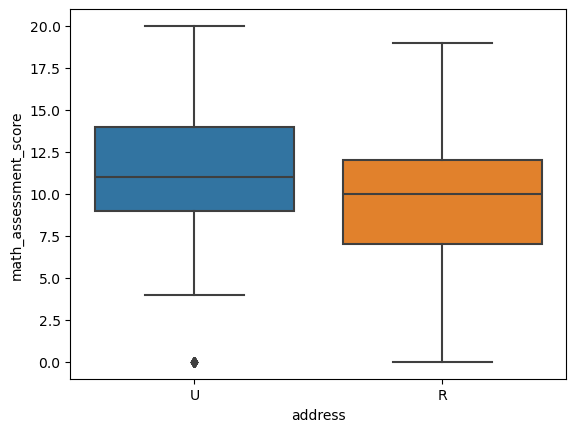

In [20]:
sns.boxplot(data=students, x='address', y='math_assessment_score')
plt.show()
plt.close()

---

### Do you remember our original question? (That's ok me either!) 

We wanted to know if there is an association between address (urban or rural) and the outcomes of the math_assessement test the students participated in. 

What do you think? 

#### Box and Whiskers
Let's start by describing how a boxplot measures data. 

Some people refer to this as **box and whiskers**, where the whiskers are the lines or arms extending from the colored box. 
- The line in the middle of the box is the **median** or 50% quartile.
- The box itself represents the **(IQR) interquartile range**.
- The lower edge (top-bottom) or left edge (left-right) is the 25% quartile.
- The upper edge (top-bottom) or right edge (left-right) is the 75% quartile.
- The lines at the edge of the whiskers are the minimum and maximum values (This is going to be confusing in a second...).
- Any diamonds or dots outside the whiskers are outliers.


##### Tangent
You're probably wondering how the outliers are identified.

Mathematically the common formula for this is: 
- **lower**: Values less than Q1 - 1.5 X IQR
- **upper**: Values greater than Q3 + 1.5 X IQR.

We can test this. 

If you revisit our ```describe()``` call above on the **urban** set. 

```
count    307.000000
mean      10.674267
std        4.563075
min        0.000000
25%        9.000000
50%       11.000000
75%       14.000000
max       20.000000
```

We see that the minimum value is 0, but our boxplot disagrees. It shows something that appears to be ~4. The 0 is an outlier. 

Let's calculate the lower bound mentioned above. 
Q1 = 25% = 9
The IQR = Q3 - Q1 = 14 -9 = 5

So the equation is: 9 - 1.5 x 5 = **1.5**

The 0 falls outside of that range, so it is plotted by ```matplotlib``` and ```seaborn``` as an outlier. The actual values more than likely don't go below whatever the value is that is reflected by the end of the whisker. 

##### End Tangent

Now that we understand the box and whiskers plot... what do you see? 

- the medians are almost the same.
- the IQRs have about 50% overlap, maybe more.
- The upper whiskers are almost even
- The lower whiskers are a little bit more interesting. The 0 in rural falls into the range of the IQR, whereas it's an outlier in urban, which suggests that there were a greater number of rural students who did poorly.

This tells us that, overall, the students appeared to do mostly the same on the assessment regardless of where they lived. Our analysis would lead us to believe that there is little to no association between address and score. 

```
This tells you (the learner) that:

- similar results mean less association.
- different results mean more association or correlation.

Showing a change tied to variables is what we want to see in most cases. If Y remains the same in response to a different X... we don't learn as much as we do when Y changes too. 
```

#### Overlapping Histograms. 

This is just a different visualization for looking for associations. Same data, different picture. 

The trick to overlapping histograms is transparency. Like literal visual transparency otherwise we can't see through the top histogram to the bottom one. 

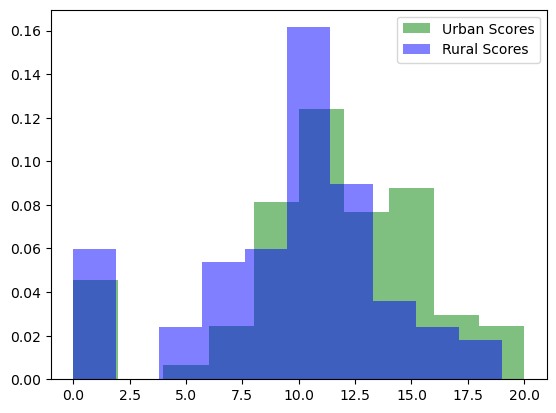

In [21]:
# alpha is the variable to set transparency. 50% is a good baseline. 
# density used to be called 'normed'. This normalizes the values to be displayed as a probability density rather than frequency. 
plt.hist(urban, color='green', label='Urban Scores',alpha=0.5, density=True)
plt.hist(rural, color='blue', label='Rural Scores', alpha=0.5, density=True)

# useful if you want people to know what they are looking at. 
plt.legend()
plt.show()
plt.close()

One of the reasons I like this is that it gives us a better indication of frequency or proportion. You can see that there is a gap between the observed 0 in both distributions, which suggests that it could potentially be an outlier in either case (semantically) despite the fact that it wasn't categorized as one for the rural distribution (formulaically) 

Why did I use the ```density=True``` flag to convert the visualization into proporitions rather than the default frequencies? 

Numerically, it wasn't apples to apples. We had only 88 observations from rural students but 307 from urban students. In some cases, the disparity is even larger. 

```ratios are better for comparison than actual values```

See for yourself...

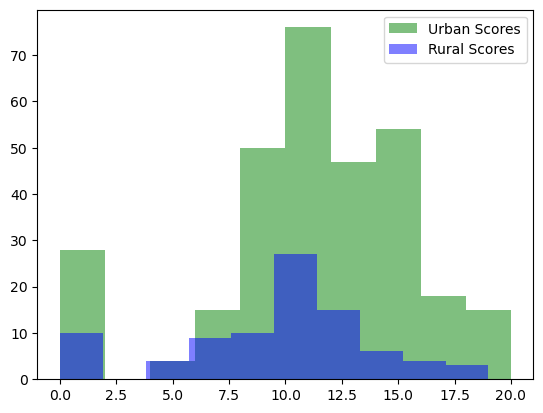

In [22]:
# same viz w/o normalization
plt.hist(urban, color='green', label='Urban Scores',alpha=0.5)
plt.hist(rural, color='blue', label='Rural Scores', alpha=0.5)

# useful if you want people to know what they are looking at. 
plt.legend()
plt.show()
plt.close()

### One last peek... what if our categorical variable wasn't binary??

In many cases, we aren't trying to compare between two known groups or clusters. Sometimes we're analyzing a feature or variable to look for patterns or associations to try to solve a problem or better understand the problem space itself. 

What if we compared the scores to mom and dad's jobs? 

```
It hopefully goes without saying that this is much easier to do w/ boxplots than overlapping histograms... although there are some cool 3d tools out there that make the latter possible although not any more viable. 
```

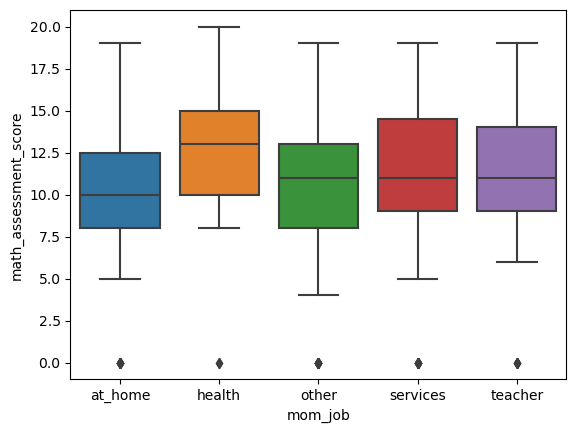

In [23]:
# Mom
sns.boxplot(data=students, x='mom_job',y='math_assessment_score')
plt.show()
plt.close()

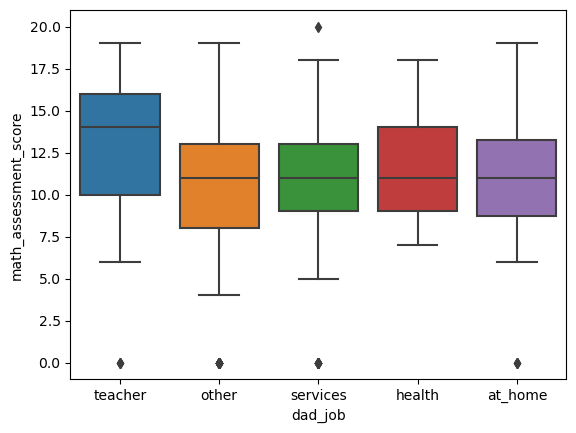

In [24]:
# Dad
sns.boxplot(data=students, x='dad_job',y='math_assessment_score')
plt.show()
plt.close()

As you can see.. it doesn't appear there is much association here. We can certainly see some trends (i.e. dad teachers IQR is much higher). 

Intuitively this makes sense. Think about the data and the reality of the situations for a moment. Just because mom or dad are teachers doesn't mean they are helping their kids with their homework. We don't have a variable for that. We would need to correlate jobs to homework helpers to score. Or, in this case, jobs to math assessment study helpers. Do the students receive extra help? etc. so on and so forth. 